In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv("stock.csv", parse_dates = ["Date"])
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1510 non-null   datetime64[ns]
 1   Open Price       1510 non-null   float64       
 2   High Price       1510 non-null   float64       
 3   Low Price        1510 non-null   float64       
 4   Close Price      1510 non-null   float64       
 5   Adj Close Price  1510 non-null   float64       
 6   Volume           1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.7 KB


In [3]:
prices.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [4]:
stock = pd.DataFrame()

In [5]:
stock["Date"] = prices["Date"]
stock["Apple"] = prices["Adj Close Price"]

In [6]:
stock.head(40)

,Date,Apple
0,2014-05-27,80.948952
1,2014-05-28,80.739334
2,2014-05-29,82.210480
3,2014-05-30,81.902557
4,2014-06-02,81.339699
5,2014-06-03,82.489952
6,2014-06-04,83.431915
7,2014-06-05,83.759270
8,2014-06-06,83.528938
9,2014-06-09,84.865509


In [7]:
# Dual Moving avg Crossover

In [8]:
# Short Term Simple Moving Average
stock["SM30"] = stock["Apple"].rolling(30).mean()

# Long Term Simple Moving Average
stock["SM100"] = stock["Apple"].rolling(100).mean()

In [9]:
stock.head()

,Date,Apple,SM30,SM100
0,2014-05-27,80.948952,NaN,NaN
1,2014-05-28,80.739334,NaN,NaN
2,2014-05-29,82.210480,NaN,NaN
3,2014-05-30,81.902557,NaN,NaN
4,2014-06-02,81.339699,NaN,NaN


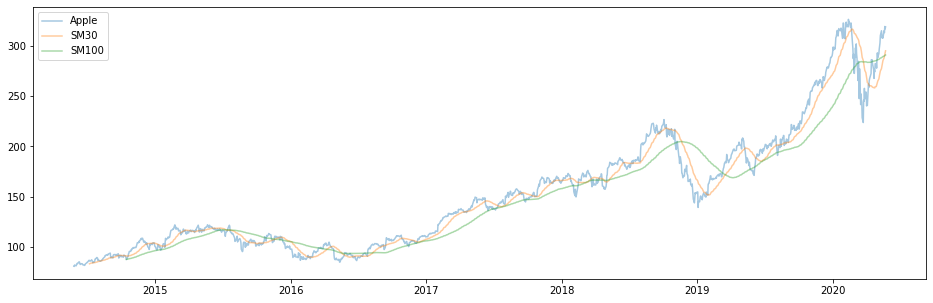

In [10]:
plt.figure(figsize=(16,5))

plt.plot(stock["Date"], stock["Apple"], label = "Apple", alpha = 0.4)
plt.plot(stock["Date"], stock["SM30"], label = "SM30", alpha = 0.4)
plt.plot(stock["Date"], stock["SM100"], label = "SM100", alpha = 0.4)

plt.legend()

plt.show()

In [11]:
# for i,row in stock.iterrows():
#     print(i,row)

In [12]:
stock.iloc[200:220]

,Date,Apple,SM30,SM100
200,2015-03-12,114.217110,114.883391,105.248859
201,2015-03-13,113.427818,115.041169,105.494125
202,2015-03-16,114.676003,115.293575,105.732849
203,2015-03-17,116.594139,115.565124,105.966088
204,2015-03-18,117.906548,115.879811,106.207717
205,2015-03-19,117.016342,116.137095,106.423697
206,2015-03-20,115.547905,116.319427,106.621442
207,2015-03-23,116.750168,116.572733,106.832211
208,2015-03-24,116.272911,116.785963,107.023371
209,2015-03-25,113.235100,116.827569,107.178692


In [13]:
def buy_sell(df):
    buy_signal_price = []
    sell_signal_price = []
    holding = [] # 1 for hold, 0 for not hold
    actions = [] # 0, 1, -1
    sig = 0
    for i,row in df.iterrows():
        if row["SM30"] > row["SM100"]:
            if sig != 1:
                buy_signal_price.append(row["Apple"])
                sell_signal_price.append(np.nan)
                holding.append(1)
                sig = 1
                actions.append(sig)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                holding.append(1)
                actions.append(0)
        elif row["SM30"] < row["SM100"]:
            if sig != -1:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(row["Apple"])
                holding.append(0)
                sig = -1
                actions.append(sig)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                holding.append(0)
                actions.append(0)
        else:
            buy_signal_price.append(np.nan)
            sell_signal_price.append(np.nan)
            holding.append(0)
            actions.append(0)
    return buy_signal_price, sell_signal_price, holding, actions

In [14]:
buysell = buy_sell(stock)

In [15]:
len(buysell)

4

In [16]:
stock["Buy Price"], stock["Sell Price"], stock["Hold"], stock["Actions"]= buysell

In [17]:
pd.options.display.max_rows = None

In [18]:
stock

,Date,Apple,SM30,SM100,Buy Price,Sell Price,Hold,Actions
0,2014-05-27,80.948952,NaN,NaN,NaN,NaN,0,0
1,2014-05-28,80.739334,NaN,NaN,NaN,NaN,0,0
2,2014-05-29,82.210480,NaN,NaN,NaN,NaN,0,0
3,2014-05-30,81.902557,NaN,NaN,NaN,NaN,0,0
4,2014-06-02,81.339699,NaN,NaN,NaN,NaN,0,0
5,2014-06-03,82.489952,NaN,NaN,NaN,NaN,0,0
6,2014-06-04,83.431915,NaN,NaN,NaN,NaN,0,0
7,2014-06-05,83.759270,NaN,NaN,NaN,NaN,0,0
8,2014-06-06,83.528938,NaN,NaN,NaN,NaN,0,0
9,2014-06-09,84.865509,NaN,NaN,NaN,NaN,0,0


In [19]:
113.6 - 88.7

24.89999999999999

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


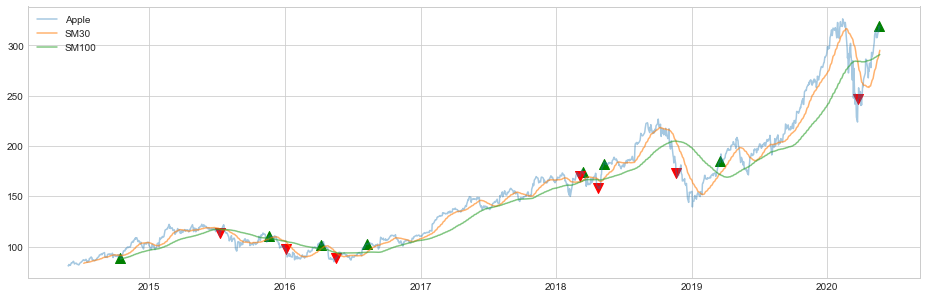

In [21]:
plt.figure(figsize=(16,5))
plt.style.use("seaborn-whitegrid")

plt.plot(stock["Date"], stock["Apple"], label = "Apple", alpha = 0.4)
plt.plot(stock["Date"], stock["SM30"], label = "SM30", alpha = 0.6)
plt.plot(stock["Date"], stock["SM100"], label = "SM100", alpha = 0.6)

plt.scatter(stock["Date"],stock["Buy Price"], marker = "^", color = "green", s = 100)
plt.scatter(stock["Date"],stock["Sell Price"], marker = "v", color = "red", s = 100)

plt.legend()
plt.show()